<a href="https://colab.research.google.com/github/FaisalMashuri/Deep-Learning/blob/main/Airline_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faisalmashuri","key":"efbe9daafda983e1248bba116e62294e"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 85.9MB/s]


In [ ]:
import os
from zipfile import ZipFile

zip_dir = '/content/twitter-airline-sentiment.zip'
zip_ref = ZipFile(zip_dir, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Tweets.csv')
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569670286418841603,positive,0.3691,NaN,0.0000,American,NaN,lmaxwell11,NaN,0,@AmericanAir no worries even though I was talk...,NaN,2015-02-22 17:29:14 -0800,O.K.C.,Central Time (US & Canada)
1,569804373859020801,negative,1.0000,Customer Service Issue,1.0000,American,NaN,flemmingerin,NaN,0,@AmericanAir @loganex except if you call now y...,NaN,2015-02-23 02:22:03 -0800,San Diego,NaN
2,568527545097805824,negative,0.6644,Customer Service Issue,0.3428,US Airways,NaN,RichieG99,NaN,0,@USAirways what is the holdup? Should I be loo...,NaN,2015-02-19 13:48:24 -0800,new yorker stranded in PA,NaN
3,569304186548047872,positive,0.6756,NaN,0.0000,Delta,NaN,Margo221,NaN,0,@JetBlue Another awesome telephone experience ...,NaN,2015-02-21 17:14:29 -0800,NaN,Eastern Time (US & Canada)
4,567897640035160064,negative,1.0000,Bad Flight,0.6809,United,NaN,agrace001,NaN,0,@united my son is a passenger on flight 3710 f...,NaN,2015-02-17 20:05:23 -0800,A Texan in Toronto,NaN


In [ ]:
data = data[['airline_sentiment','text']]
data.head()

,airline_sentiment,text
0,positive,@AmericanAir no worries even though I was talk...
1,negative,@AmericanAir @loganex except if you call now y...
2,negative,@USAirways what is the holdup? Should I be loo...
3,positive,@JetBlue Another awesome telephone experience ...
4,negative,@united my son is a passenger on flight 3710 f...


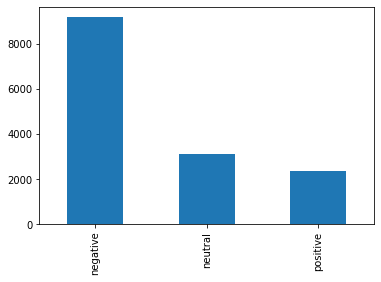

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
data['airline_sentiment'].value_counts().sort_index().plot.bar()


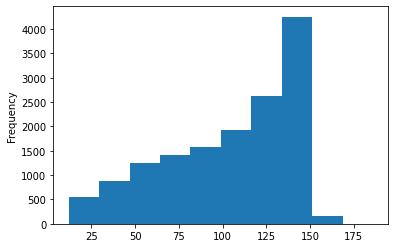

In [ ]:
data['text'].str.len().plot.hist()

In [ ]:

data['text'] = data['text'].str.replace('@VirginAmerica', '')
data.head()

,airline_sentiment,text
0,positive,@AmericanAir no worries even though I was talk...
1,negative,@AmericanAir @loganex except if you call now y...
2,negative,@USAirways what is the holdup? Should I be loo...
3,positive,@JetBlue Another awesome telephone experience ...
4,negative,@united my son is a passenger on flight 3710 f...


In [ ]:
import re
# data['text'].apply(lambda x: x.lower()) #transform text to lowercase
# data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
# data['text'].head()

data['text'].apply(lambda x: x.lower()) #transform text to lowercase
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['text'].head()

0    AmericanAir no worries even though I was talki...
1    AmericanAir loganex except if you call now you...
2    USAirways what is the holdup Should I be looki...
3    JetBlue Another awesome telephone experience w...
4    united my son is a passenger on flight 3710 fr...
Name: text, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          13,   28,  927,  135,  374,    3,   23, 1086,   80,  143, 1916],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   13, 1087,   65,    6,
          83,   39, 1027,   30,    2,  237,  463, 1257,   19,  112,  266],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   12,
          57,   14,    2, 3098,  119,    3,   32,  308,    7,  142,    8],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   17,  142,  293, 3099,  196,   25,   17,   68,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    5,
          11, 1088,   14,    4,  6

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 33, 256)           1280000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 33, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 33, 256)           525312    
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:

y = pd.get_dummies(data['airline_sentiment']).values
[print(data['airline_sentiment'][i], y[i]) for i in range(0,5)]

positive [0 0 1]
negative [1 0 0]
negative [1 0 0]
positive [0 0 1]
negative [1 0 0]


[None, None, None, None, None]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
batch_size = 32
epochs = 8

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
366/366 - 212s - loss: 0.6557 - acc: 0.7305 - val_loss: 0.5153 - val_acc: 0.8074
Epoch 2/8
366/366 - 206s - loss: 0.4382 - acc: 0.8291 - val_loss: 0.4906 - val_acc: 0.8128
Epoch 3/8
366/366 - 205s - loss: 0.3488 - acc: 0.8667 - val_loss: 0.5301 - val_acc: 0.8087
Epoch 4/8
366/366 - 207s - loss: 0.2841 - acc: 0.8927 - val_loss: 0.5782 - val_acc: 0.8009
Epoch 5/8
366/366 - 209s - loss: 0.2322 - acc: 0.9127 - val_loss: 0.6028 - val_acc: 0.7954
Epoch 6/8
366/366 - 207s - loss: 0.1920 - acc: 0.9285 - val_loss: 0.6630 - val_acc: 0.7865
Epoch 7/8


KeyboardInterrupt: ignored

In [ ]:

predictions = model.predict(X_test)

[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

united Flight attendant never served me my beverage tea and not once checked up on me What gives ua6076 notcool [9.916305e-01 7.835475e-03 5.340237e-04] [0 1 0]
JetBlue Flight 1133 N353JB Blue La La departs mco enroute to San Juan International Airport httptcoSWZm2fX3nu [0.00617008 0.9715898  0.02224015] [1 0 0]
USAirways ur specialist said they would talk to the stewardess about not serving drunks drinks REALLY how does that help [9.9941623e-01 5.5622251e-04 2.7501565e-05] [1 0 0]
USAirways 603 amp 2705 DFW to PSP thank you [9.9654996e-01 3.2980670e-03 1.5192297e-04] [0 1 0]
JetBlue Tomorrow wouldnt have been soon enough Thank you for the info [9.9931443e-01 6.7399704e-04 1.1581613e-05] [1 0 0]


[None, None, None, None, None]

In [ ]:
import numpy as np
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 419
Neutral predictions: 650
Negative predictions: 1859
Real positive: 472
Real neutral: 607
Real negative: 1849
